# Preprocessing: 

- cleaning
- removing duplicates
- feature engineering 
- transformation(encoding,scaling) etc.




# Unclean Data 
- Dirty data( issues with content)
- Messy data (issues with structure) like while extarcted data from two different sources. so we get inconsistent data. as student name and st_name while merging it creates incosnistent.

## Dirty data :
- Duplicated data
- Missing data
- noisy data
- Inaccurate/invalid data :(anolmolies) like age can never be zero, weight and height is in negative, pin code is not in format 
- Inconsistent data  : Madrid and madrid , phone no  like 0110333 or 986629299
    
Dirty Data eg : 3.4kmph , company name and models value interchange..


# data quality dimension :
-completeness : no missing values

-validity: weight is not negative

-accuracy 

-consisitent : madrid and Madrid , delhi and dlh


# handling missing values

In [1]:
import pandas as pd
import numpy as np

# missing values:nan,Nan,Nat

# cause of missing values

# explicitly create nan: np.nan

In [2]:
df=pd.DataFrame({"name":["pranav","dhruv"],"course":[np.nan,"ds"],"marks":[np.nan,56]})

In [3]:
df

,name,course,marks
0,pranav,NaN,NaN
1,dhruv,ds,56.0


In [4]:
df = pd.DataFrame({"Age":[12,np.nan,14,np.nan,35,12,13,24,12,13,45,80],"Height":[130,np.nan,133,143,123,np.nan,np.nan,np.nan,120,121,124,125],"Gender":["m","f",np.nan,"m",np.nan,"f","m",np.nan,np.nan,"m","m","m"]})
df


,Age,Height,Gender
0,12.0,130.0,m
1,NaN,NaN,f
2,14.0,133.0,NaN
3,NaN,143.0,m
4,35.0,123.0,NaN
5,12.0,NaN,f
6,13.0,NaN,m
7,24.0,NaN,NaN
8,12.0,120.0,NaN
9,13.0,121.0,m


# detection of missing values

In [5]:
df["Age"].isnull()

0     False
1      True
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
Name: Age, dtype: bool

In [6]:
df["Age"].isnull().sum()

2

# check the data where particular column has missing values

In [7]:
df[df["Age"].isnull()]

,Age,Height,Gender
1,NaN,NaN,f
3,NaN,143.0,m


# multiple columns

In [8]:
df[["Age","Height"]].isnull()

,Age,Height
0,False,False
1,True,True
2,False,False
3,True,False
4,False,False
5,False,True
6,False,True
7,False,True
8,False,False
9,False,False


In [9]:
df[["Age","Height"]].isnull().sum()

Age       2
Height    4
dtype: int64

# missing values count of all the columns

In [10]:
df.isnull().sum()

Age       2
Height    4
Gender    4
dtype: int64

# total missing values in df

In [11]:
df.isnull().sum().sum()

10

# detection of missing values percentage

In [12]:
for i in df.columns:
    print(i,"-----------",df[i].isnull().sum()*100/df.shape[0],"%")

Age ----------- 16.666666666666668 %
Height ----------- 33.333333333333336 %
Gender ----------- 33.333333333333336 %


# handling 
- drop
- fill

In [13]:
df

,Age,Height,Gender
0,12.0,130.0,m
1,NaN,NaN,f
2,14.0,133.0,NaN
3,NaN,143.0,m
4,35.0,123.0,NaN
5,12.0,NaN,f
6,13.0,NaN,m
7,24.0,NaN,NaN
8,12.0,120.0,NaN
9,13.0,121.0,m


# filling process: 
- if the column type is numeric then we fill with mean or median keeping domain knowledge consider into our mind
  - if the data is having outlier then we may fill the median otherwise fill with mean
- if the data is catagorical then we fill with its mode
- fill the values based on corelation of that column with other 

In [14]:
df

,Age,Height,Gender
0,12.0,130.0,m
1,NaN,NaN,f
2,14.0,133.0,NaN
3,NaN,143.0,m
4,35.0,123.0,NaN
5,12.0,NaN,f
6,13.0,NaN,m
7,24.0,NaN,NaN
8,12.0,120.0,NaN
9,13.0,121.0,m


In [15]:
for i in df.columns:
    print(i,"-----------",df[i].isnull().sum()*100/df.shape[0],"%",df[i].dtypes)

Age ----------- 16.666666666666668 % float64
Height ----------- 33.333333333333336 % float64
Gender ----------- 33.333333333333336 % object


In [16]:
df["Gender"].mode()

0    m
Name: Gender, dtype: object

In [17]:
df['Gender']=df["Gender"].fillna(df["Gender"].mode()[0])

In [18]:
df['Gender'].isnull().sum()

0

In [19]:
import seaborn as sns

<Axes: >

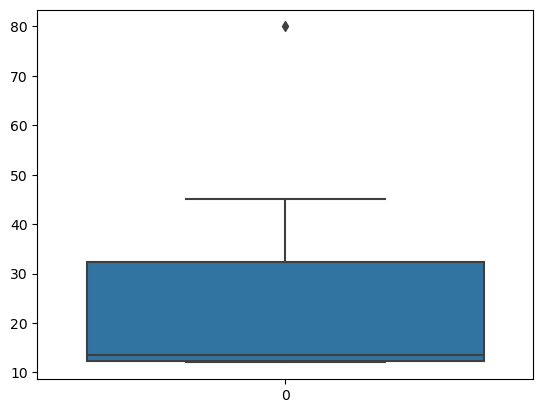

In [20]:
sns.boxplot(df["Age"])

In [21]:
df['Age']=df["Age"].fillna(df["Age"].median())

In [22]:
df['Age'].isnull().sum()

0

<Axes: >

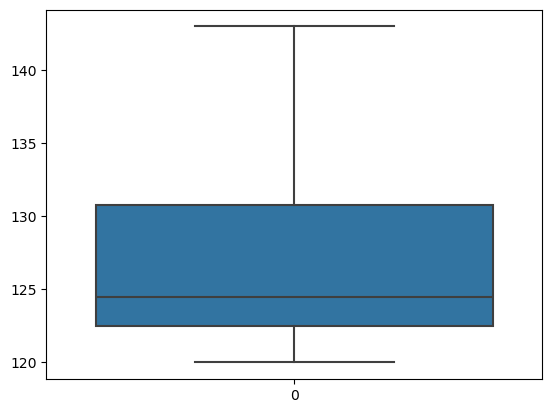

In [23]:
sns.boxplot(df["Height"])

In [24]:
df['Height']=df["Height"].fillna(df["Height"].mean())

In [25]:
df.isnull().sum()

Age       0
Height    0
Gender    0
dtype: int64

# dropna: it deletes the rows and columns corresponding to nan

In [26]:
df=pd.DataFrame({"A":[1,2,np.nan],"B":[np.nan,6,np.nan],"c":[1,2,3]})  #np.nan is used to add missing values 
df

,A,B,c
0,1.0,NaN,1
1,2.0,6.0,2
2,NaN,NaN,3


In [27]:
df.dropna() # by default it drop rows

,A,B,c
1,2.0,6.0,2


In [28]:
df.dropna(how="all") # by defalut how is any means atleat 1 nan

,A,B,c
0,1.0,NaN,1
1,2.0,6.0,2
2,NaN,NaN,3


In [29]:
df.dropna(axis=1) # it drops columns

,c
0,1
1,2
2,3


In [30]:
df.dropna(axis=1,how="all") 

,A,B,c
0,1.0,NaN,1
1,2.0,6.0,2
2,NaN,NaN,3


# subset

In [31]:
df

,A,B,c
0,1.0,NaN,1
1,2.0,6.0,2
2,NaN,NaN,3


In [32]:
df.dropna(subset=["A"])

,A,B,c
0,1.0,NaN,1
1,2.0,6.0,2


In [33]:
df=pd.read_csv("C:\\PRANAV\\Madrid Software\\Python\\data sets\\upcoming-event.csv")

In [34]:
df

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Mackenzie Dern,Marina Rodriguez,-195,165,51.282051,165.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,500,400.0,100,2800.0,900,380.0
1,Randy Brown,Jared Gooden,-265,215,37.735849,215.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,200,550.0,400,1600.0,215,500.0
2,Tim Elliott,Matheus Nicolau,155,-180,155.000000,55.555556,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,240,120.0,800,450.0,1600,650.0
3,Sabina Mazo,Mariya Agapova,-190,160,52.631579,160.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,130,350.0,800,800.0,350,750.0
4,Chris Gutierrez,Felipe Colares,-235,190,42.553191,190.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,-110,400.0,1000,600.0,400,1200.0
5,Alexandr Romanov,Jared Vanderaa,-525,385,19.047619,385.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,450,1100.0,140,2200.0,165,700.0
6,Charles Rosa,Damon Jackson,165,-195,165.000000,51.282051,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,300,140.0,650,350.0,1100,700.0
7,Loopy Godinez,Silvana Gomez Juarez,-335,260,29.850746,260.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,-135,NaN,700,NaN,400,NaN
8,Steve Garcia,Charlie Ontiveros,-335,260,29.850746,260.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,NaN,...,NaN,NaN,NaN,NaN,400,650.0,800,1400.0,-135,650.0


In [35]:
df.shape

(9, 119)

In [36]:
df.isnull().sum()

R_fighter     0
B_fighter     0
R_odds        0
B_odds        0
R_ev          0
             ..
b_dec_odds    1
r_sub_odds    0
b_sub_odds    1
r_ko_odds     0
b_ko_odds     1
Length: 119, dtype: int64

In [37]:
df.isnull().sum().sum()

300

In [38]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i,"-----------",df[i].isnull().sum()*100/df.shape[0],"%","type is ",df[i].dtypes)   

Winner ----------- 100.0 % type is  float64
B_match_weightclass_rank ----------- 77.77777777777777 % type is  float64
R_match_weightclass_rank ----------- 77.77777777777777 % type is  float64
R_Women's Flyweight_rank ----------- 100.0 % type is  float64
R_Women's Featherweight_rank ----------- 100.0 % type is  float64
R_Women's Strawweight_rank ----------- 88.88888888888889 % type is  float64
R_Women's Bantamweight_rank ----------- 100.0 % type is  float64
R_Heavyweight_rank ----------- 100.0 % type is  float64
R_Light Heavyweight_rank ----------- 100.0 % type is  float64
R_Middleweight_rank ----------- 100.0 % type is  float64
R_Welterweight_rank ----------- 100.0 % type is  float64
R_Lightweight_rank ----------- 100.0 % type is  float64
R_Featherweight_rank ----------- 100.0 % type is  float64
R_Bantamweight_rank ----------- 100.0 % type is  float64
R_Flyweight_rank ----------- 88.88888888888889 % type is  float64
R_Pound-for-Pound_rank ----------- 88.88888888888889 % type is  float6

In [39]:
for i in df.columns:
    if df[i].isnull().sum()*100/df.shape[0]>70:
        df.drop(columns=[i],inplace=True)

In [40]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i,"-----------",df[i].isnull().sum()*100/df.shape[0],"%","type is ",df[i].dtypes)   

b_dec_odds ----------- 11.11111111111111 % type is  float64
b_sub_odds ----------- 11.11111111111111 % type is  float64
b_ko_odds ----------- 11.11111111111111 % type is  float64


In [41]:
l=["b_dec_odds","b_sub_odds","b_ko_odds"]
for i in l:
    df[i]=df[i].fillna(df[i].median())

In [42]:
df

,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,title_bout,...,avg_td_dif,empty_arena,constant_1,better_rank,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Mackenzie Dern,Marina Rodriguez,-195,165,51.282051,165.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,False,...,-0.23,1,1,Red,500,400.0,100,2800.0,900,380.0
1,Randy Brown,Jared Gooden,-265,215,37.735849,215.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,False,...,-0.02,1,1,neither,200,550.0,400,1600.0,215,500.0
2,Tim Elliott,Matheus Nicolau,155,-180,155.000000,55.555556,2021-10-09,"Las Vegas, Nevada, USA",USA,False,...,-2.08,1,1,Red,240,120.0,800,450.0,1600,650.0
3,Sabina Mazo,Mariya Agapova,-190,160,52.631579,160.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,False,...,0.42,1,1,neither,130,350.0,800,800.0,350,750.0
4,Chris Gutierrez,Felipe Colares,-235,190,42.553191,190.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,False,...,1.43,1,1,neither,-110,400.0,1000,600.0,400,1200.0
5,Alexandr Romanov,Jared Vanderaa,-525,385,19.047619,385.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,False,...,-4.22,1,1,neither,450,1100.0,140,2200.0,165,700.0
6,Charles Rosa,Damon Jackson,165,-195,165.000000,51.282051,2021-10-09,"Las Vegas, Nevada, USA",USA,False,...,-0.64,1,1,neither,300,140.0,650,350.0,1100,700.0
7,Loopy Godinez,Silvana Gomez Juarez,-335,260,29.850746,260.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,False,...,-3.00,1,1,neither,-135,400.0,700,1100.0,400,675.0
8,Steve Garcia,Charlie Ontiveros,-335,260,29.850746,260.000000,2021-10-09,"Las Vegas, Nevada, USA",USA,False,...,-0.61,1,1,neither,400,650.0,800,1400.0,-135,650.0


In [43]:
df.isnull().sum()

R_fighter     0
B_fighter     0
R_odds        0
B_odds        0
R_ev          0
             ..
b_dec_odds    0
r_sub_odds    0
b_sub_odds    0
r_ko_odds     0
b_ko_odds     0
Length: 85, dtype: int64

In [44]:
df.isnull().sum().sum()

0

# handling duplicacy

In [45]:
employees = [('Stuti', 28, 'Varanasi'),
            ('Saumya', 32, 'Delhi'),
            ('Aaditya', 25, 'Mumbai'),
            ('Saumya', 32, 'Delhi'),
            ('Saumya', 32, 'Delhi'),
            ('Saumya', 32, 'Mumbai'),
            ('Aaditya', 40, 'Dehradun'),
            ('Seema', 32, 'Delhi')
            ]
 
# Creating a DataFrame object 
df = pd.DataFrame(employees,columns = ['Name', 'Age', 'City'])
df


,Name,Age,City
0,Stuti,28,Varanasi
1,Saumya,32,Delhi
2,Aaditya,25,Mumbai
3,Saumya,32,Delhi
4,Saumya,32,Delhi
5,Saumya,32,Mumbai
6,Aaditya,40,Dehradun
7,Seema,32,Delhi


In [46]:
df.duplicated()

0    False
1    False
2    False
3     True
4     True
5    False
6    False
7    False
dtype: bool

In [47]:
df[df.duplicated()] # masking

,Name,Age,City
3,Saumya,32,Delhi
4,Saumya,32,Delhi


In [48]:
df.duplicated().sum()

2

In [49]:
df[df.duplicated(keep="last")]

,Name,Age,City
1,Saumya,32,Delhi
3,Saumya,32,Delhi


In [50]:
df[df.duplicated(subset=["Name","Age"])] # for particular column

,Name,Age,City
3,Saumya,32,Delhi
4,Saumya,32,Delhi
5,Saumya,32,Mumbai


# handling

In [51]:
df1=df.drop_duplicates()

In [52]:
df1

,Name,Age,City
0,Stuti,28,Varanasi
1,Saumya,32,Delhi
2,Aaditya,25,Mumbai
5,Saumya,32,Mumbai
6,Aaditya,40,Dehradun
7,Seema,32,Delhi


In [53]:
df1=df.drop_duplicates().reset_index()

In [54]:
df1

,index,Name,Age,City
0,0,Stuti,28,Varanasi
1,1,Saumya,32,Delhi
2,2,Aaditya,25,Mumbai
3,5,Saumya,32,Mumbai
4,6,Aaditya,40,Dehradun
5,7,Seema,32,Delhi


In [55]:
df1=df.drop_duplicates().reset_index(drop=True)

In [56]:
df1

,Name,Age,City
0,Stuti,28,Varanasi
1,Saumya,32,Delhi
2,Aaditya,25,Mumbai
3,Saumya,32,Mumbai
4,Aaditya,40,Dehradun
5,Seema,32,Delhi


In [57]:
df=sns.load_dataset("titanic")

In [58]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [59]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [60]:
df.drop(columns=['pclass','who', 'adult_male','embarked','alive', 'alone'],inplace=True)

In [61]:
df.shape

(891, 9)

In [62]:
#df.duplicated().sum()

In [63]:
#df[df.duplicated().sum()]

In [64]:
for i in df.columns:
    if df[i].isnull().any():
        print(i,"-----------",df[i].isnull().sum()*100/df.shape[0],"%")

age ----------- 19.865319865319865 %
deck ----------- 77.21661054994388 %
embark_town ----------- 0.2244668911335578 %


In [65]:
df.drop(columns=["deck"],inplace=True)

In [66]:
df.shape

(891, 8)

In [67]:
df["age"].dtypes

dtype('float64')

<Axes: >

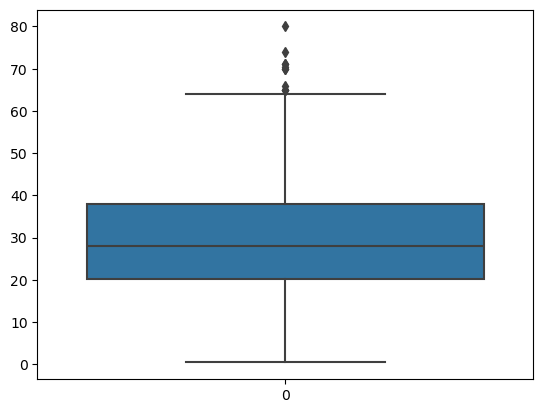

In [68]:
sns.boxplot(df["age"])

In [69]:
df["age"]=df["age"].fillna(df["age"].median())

In [70]:
df["embark_town"].dtypes

dtype('O')

In [71]:
df["embark_town"].mode()

0    Southampton
Name: embark_town, dtype: object

In [72]:
df["embark_town"]=df["embark_town"].fillna(df["embark_town"].mode()[0])

In [73]:
df.isnull().sum()

survived       0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
embark_town    0
dtype: int64

In [74]:
df.isnull().sum().sum()

0

In [75]:
df

,survived,sex,age,sibsp,parch,fare,class,embark_town
0,0,male,22.0,1,0,7.2500,Third,Southampton
1,1,female,38.0,1,0,71.2833,First,Cherbourg
2,1,female,26.0,0,0,7.9250,Third,Southampton
3,1,female,35.0,1,0,53.1000,First,Southampton
4,0,male,35.0,0,0,8.0500,Third,Southampton
...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,Second,Southampton
887,1,female,19.0,0,0,30.0000,First,Southampton
888,0,female,28.0,1,2,23.4500,Third,Southampton
889,1,male,26.0,0,0,30.0000,First,Cherbourg


# describe: 

In [76]:
df.describe()

,survived,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.361582,0.523008,0.381594,32.204208
std,0.486592,13.019697,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [78]:
df.shape

(891, 8)

In [79]:
df.describe(percentiles=[0.2,0.75,0.9]).T

,count,mean,std,min,20%,50%,75%,90%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000,1.0000
age,891.0,29.361582,13.019697,0.42,20.0000,28.0000,35.0,47.0000,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,1.0000,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,2.0000,6.0000
fare,891.0,32.204208,49.693429,0.00,7.8542,14.4542,31.0,77.9583,512.3292


# percentile : it means 90% of all students have less marks than 90%

In [80]:
df.describe(include="object").T

,count,unique,top,freq
sex,891,2,male,577
embark_town,891,3,Southampton,646


In [81]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,891.0,NaN,NaN,NaN,29.361582,13.019697,0.42,22.0,28.0,35.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
embark_town,891,3,Southampton,646,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- count
- unique
- nunique
- value_counts
- replace

In [83]:
df=pd.DataFrame({"names":["riya","tina","vini","jai","leena",np.nan,"madhu"],"course":[np.nan,"ds","Data science","ds","Data Science","python","ds"],"marks":[45,67,-34,56,90,98,0],"weight":["56.7","67.8","56 kg","67 kg","89.6 k","62","61"],"gender":["f","f","f","m","f","f","f"]})
df

,names,course,marks,weight,gender
0,riya,NaN,45,56.7,f
1,tina,ds,67,67.8,f
2,vini,Data science,-34,56 kg,f
3,jai,ds,56,67 kg,m
4,leena,Data Science,90,89.6 k,f
5,NaN,python,98,62,f
6,madhu,ds,0,61,f


# how many courses madrid offers

In [85]:
df["course"].unique()

array([nan, 'ds', 'Data science', 'Data Science', 'python'], dtype=object)

In [86]:
df["course"]=df["course"].str.replace("ds","Data Science")

In [87]:
df["course"].unique()

array([nan, 'Data Science', 'Data science', 'python'], dtype=object)

In [88]:
df["course"]=df["course"].str.replace("Data science","Data Science")

In [89]:
df["course"].unique()

array([nan, 'Data Science', 'python'], dtype=object)

In [90]:
df["course"].nunique()

2

# which course is most demanding

In [91]:
df

,names,course,marks,weight,gender
0,riya,NaN,45,56.7,f
1,tina,Data Science,67,67.8,f
2,vini,Data Science,-34,56 kg,f
3,jai,Data Science,56,67 kg,m
4,leena,Data Science,90,89.6 k,f
5,NaN,python,98,62,f
6,madhu,Data Science,0,61,f


In [94]:
df["course"].value_counts()

course
Data Science    5
python          1
Name: count, dtype: int64

In [95]:
df

,names,course,marks,weight,gender
0,riya,NaN,45,56.7,f
1,tina,Data Science,67,67.8,f
2,vini,Data Science,-34,56 kg,f
3,jai,Data Science,56,67 kg,m
4,leena,Data Science,90,89.6 k,f
5,NaN,python,98,62,f
6,madhu,Data Science,0,61,f


# average weight

In [96]:
df["weight"].unique()

array(['56.7', '67.8', '56 kg', '67 kg', '89.6 k', '62', '61'],
      dtype=object)

In [97]:
df["weight"]=df["weight"].str.replace(" kg","").str.replace(" k",'')

In [98]:
df["weight"].unique()

array(['56.7', '67.8', '56', '67', '89.6', '62', '61'], dtype=object)

In [99]:
df["weight"]=df["weight"].astype(float)

In [100]:
df["weight"].dtypes

dtype('float64')

In [101]:
df["weight"].mean()

65.72857142857143

In [102]:
df

,names,course,marks,weight,gender
0,riya,NaN,45,56.7,f
1,tina,Data Science,67,67.8,f
2,vini,Data Science,-34,56.0,f
3,jai,Data Science,56,67.0,m
4,leena,Data Science,90,89.6,f
5,NaN,python,98,62.0,f
6,madhu,Data Science,0,61.0,f


In [103]:
df["marks"].unique()

array([ 45,  67, -34,  56,  90,  98,   0], dtype=int64)

In [104]:
df.iloc[2,2]=34
df

,names,course,marks,weight,gender
0,riya,NaN,45,56.7,f
1,tina,Data Science,67,67.8,f
2,vini,Data Science,34,56.0,f
3,jai,Data Science,56,67.0,m
4,leena,Data Science,90,89.6,f
5,NaN,python,98,62.0,f
6,madhu,Data Science,0,61.0,f


In [105]:
df["marks"].mean()

55.714285714285715

# haw many students appeared in exams

In [107]:
df["names"].count()

6

In [108]:
df[df["names"].isnull()]

,names,course,marks,weight,gender
5,NaN,python,98,62.0,f


In [109]:
df.iloc[5,0]="tanvi"

In [110]:
df

,names,course,marks,weight,gender
0,riya,NaN,45,56.7,f
1,tina,Data Science,67,67.8,f
2,vini,Data Science,34,56.0,f
3,jai,Data Science,56,67.0,m
4,leena,Data Science,90,89.6,f
5,tanvi,python,98,62.0,f
6,madhu,Data Science,0,61.0,f
